# A Better Dashboard for Covid-19

We've all seen the Covid-19 dashboard of major news outlets and research institutes.
Most of them also contain data and graphs about the daily growth rate.
Those, however, are misleading for untrained readers and should
either be removed or be more extensively annotated to prevent erroneous conclusions.

First let's have a look at the dashboards of major news outlets
around the world to see some examples:

<!-- 
Good job by the New York Times. Their first chart is new cases per day (https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html) 
-->

## Spiegel

From <https://www.spiegel.de/thema/coronavirus/>

![Spiegel - Overview Table](spiegel.png)

As you can see it prominently features the daily growth (gray numbers)
as well as the doubling time (orange numbers), 
in an attempt to make daily growth more tangible.


## New York Times

From 
<https://www.nytimes.com/interactive/2020/04/03/upshot/coronavirus-metro-area-tracker.html>

![New York Times - Daily Growth Rate](nytimes.png)

Below the graphs it goes on:

<!-- 
> What to look for:
> Root for these to go to zero. 
> Low-seeming numbers still mean a lot of growth: 
> A 20 percent daily growth rate means 
> cases or deaths will double in less than four days.

and 
-->

> With epidemics, these rates are often more important 
> than the current totals 
> because they tell us whether things are getting better or worse. 
> A reading of 40 percent on the charts above means that, 
> on average, the number of deaths in a place 
> has been increasing by 40 percent each day. 
> A reading of 100 percent would mean that cases were doubling daily.


## The Problem of Growth Rates

What I find troubling about this is, that they write 

>these rates tell us whether things are getting better or worse

Because, while it's true that a smaller growth rate is better 
than a larger one, **any growth rate still means we're doomed**.
Therefore the graph rather conveys 
if things are getting worse slower of faster,
which is a quite morbid interpretation 
of "things getting better".
Also, it is most certainly not how most people understand it.

The root problem of the Covid-19 crisis is
that our health-care system has a limit
for people that can be treated per day.
So a more common notion would be:

Things are …     | Number of new infections are …
:---------------:|:------
… not OK         | … **above** the limit
… getting worse  | … **higher** than the day before
… getting better | … **lower** than the day before
… OK             | … **the same or lower** than the day before and below the limit

So let's check out a few graphs 
of daily growth rates as seen in the New York Times
and try to tell if things are getting better or worse
according to our definition.

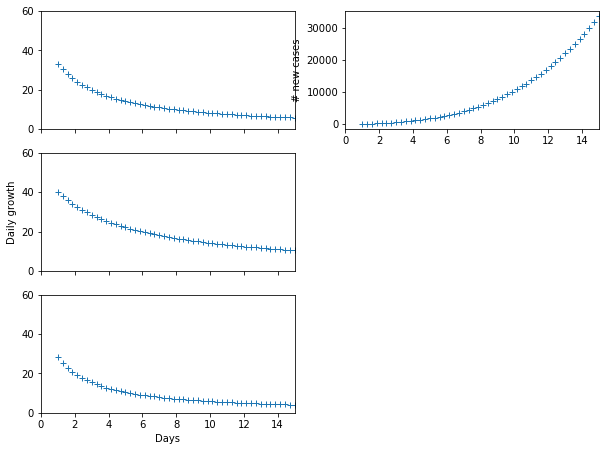

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

initial_cases = 123
x1 = np.linspace(1, 15)
y1 = 100 / (x1 + 2)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot(4, 2, 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('1')
plt.plot(x1, y1, '+')
# plt.ylabel('Daily growth')
plt.xlim(left=0, right=15)
plt.ylim(top=60, bottom=0)
plt.setp(ax1.get_xticklabels(), visible=False)

x1s = np.linspace(1, 15)

num_initial_cases = 100
y1norm = (y1 / 100) + 1
y1norm[0] *= num_initial_cases 
y1s = np.cumprod(y1norm)

ax1s = plt.subplot(4, 2, 2)
ax1s.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(x1s, y1s, '+')
plt.ylabel('# new cases')
plt.xlim(left=0, right=15)
plt.setp(ax1.get_xticklabels(), visible=False)


x2 = np.linspace(1, 15)
y2 = 100 / (x2*0.5 + 2)

ax2 = plt.subplot(4, 2, 3, sharex=ax1)
plt.plot(x2, y2, '+')
# plt.title('2')
plt.ylabel('Daily growth')
plt.ylim(top=60, bottom=0)
plt.setp(ax2.get_xticklabels(), visible=False)


x3 = np.linspace(1, 15)
y3 = 100 / (x3*1.5 + 2)

ax3 = plt.subplot(4, 2, 5, sharex=ax1)
# plt.title('3')
plt.plot(x3, y3, '+')
plt.xlabel('Days')
# plt.ylabel('Daily growth')
plt.ylim(top=60, bottom=0)

plt.show()

# My Proposal

1. **8000 new infections** yesterday
    (At an average of 6000 / day over last 5 days)
1. Capacity limit of healthcare system: **10&nbsp;000 new infections / day**

    Based on:
    1. 50&nbsp;000 normal beds + 10&nbsp;000 ICU beds
    1. 100&nbsp;000 nurses
    1. 20&nbsp;000 doctors
    1. 30&nbsp;000 ventilators
    1. 3 weeks of hospitalization
    1. 

1. **10 days** until this limit is reached
    
    Based on average growth rate of last 5 days


**
Summed up: Percentages are mostly misleading since
our problems are caused by static limits
**